# Loading data

To import data into miniML, we first need to import miniML's class MiniTrace.

In [6]:
import sys
sys.path.append('../../core/')
from miniML import MiniTrace

miniML operates on NumPy ndarrays and we can use any 1-dimensional array for event detection with miniML. In addition, miniML includes functions for loading data from various file formats that are commonly used in electrophysiology. These include HEKA PatchMaster (.dat), Axon Binary Files (.abf), and .h5 files. Data in other formats can be imported into Python as a NumPy array.

## Loading data from .h5 files

Here, we will load data from a .h5 file. The loading is done using the `from_h5_file()` method of the MiniTrace class. The required arguments are *filename*, *tracename*, *scaling*, *sampling*, and *unit*.

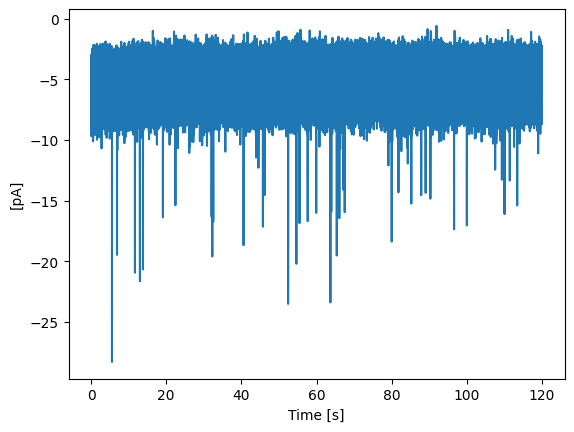

In [7]:
filename = '../../example_data/gc_mini_trace.h5'
scaling = 1e12
unit = 'pA'

# get from h5 file
h5_trace = MiniTrace.from_h5_file(filename=filename,
                                  tracename='mini_data',
                                  scaling=scaling,
                                  sampling=2e-5,
                                  unit=unit)

h5_trace.plot_trace()

## Loading data from .abf files

Data can also be loaded from Axon binary files (.abf). The .abf import method `from_axon_file()` makes use of the pyAbf library.

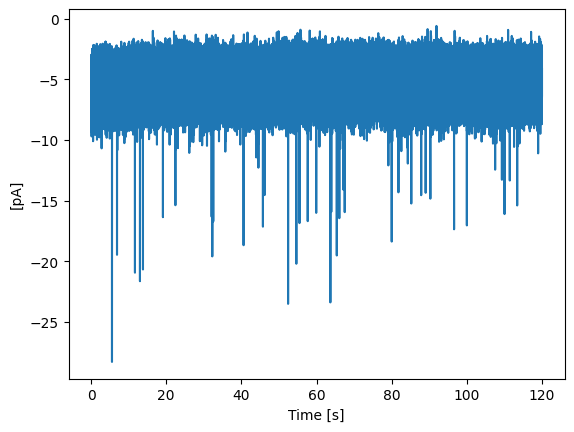

In [8]:
filename = '../../example_data/gc_mini_trace.abf'
scaling = 1
unit = 'pA'

# get from ABF file
abf_trace = MiniTrace.from_axon_file(filename=filename,
                                     channel=0,
                                     scaling=scaling,
                                     unit=unit)

abf_trace.plot_trace()

## Loading data from .dat files

To load data from HEKA PatchMaster (.dat) files, use the `from_heka_file()` method. You need to specify the PatchMaster PGF name of the recording you want to load using the *rectype* argument. Optional arguments are *group*, *scaling* and *unit*. 

```{seealso}
Please refer to the `from_heka_file()` documentation for more information.
```

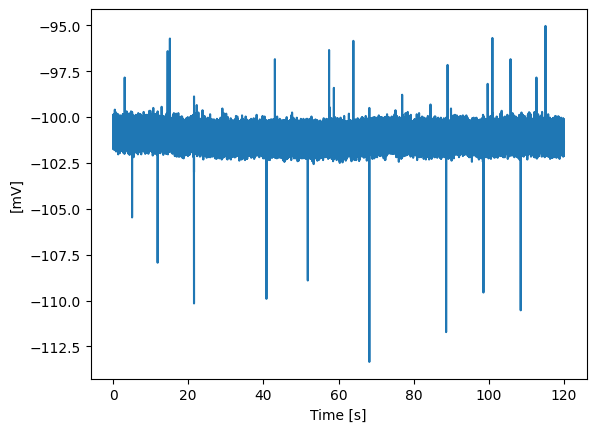

In [9]:
filename = '../../example_data/B_2020-05-14_007.dat'
rectype = 'conti CC'
scaling = 1e3
unit = 'mV'

PM_trace = MiniTrace.from_heka_file(filename=filename,
                                    rectype=rectype,
                                    group=1,
                                    scaling=scaling,
                                    unit=unit)

PM_trace.plot_trace()

## Loading data from other sources

To analyse data from any other file format, you need to import the recording into Python as a NumPy array. NumPy can read various file formats such as .csv, .txt, etc. 

Any 1d array can then be used to initiate a miniML `MiniTrace` object. Here, we create a NumPy array containing white noise. When creating a `MiniTrace` object, the required arguments are *data*, *sampling_interval*, *y_unit*, and *filename*.

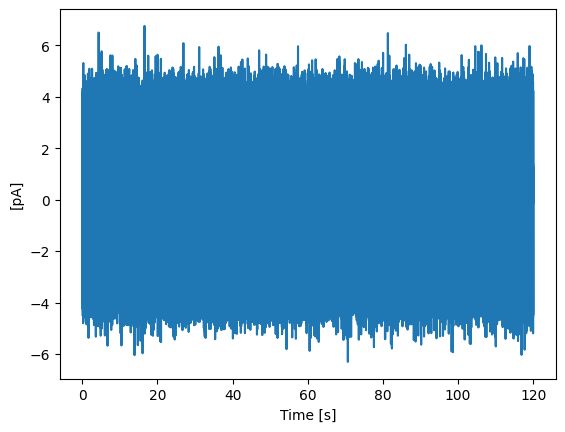

In [10]:
import numpy as np

example_data = np.random.normal(0, 1.25, 6_000_000)

np_trace = MiniTrace(data=example_data, 
                     sampling_interval=2e-5, 
                     y_unit='pA', 
                     filename=None)

np_trace.plot_trace()